In [2]:
#imports
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math


# Lab: EM1 - Tasks
1. load the data
#### Part 0:
2. measure resistance
3. do agreement test
#### Part 1:
3. 
#### Part 2:
#### Part 3:

## Load the data

In [3]:
def file_name(part, letter):
    return f'resources/data/EM1 Part {part}{letter}'
#Read in data from the csv file
data1A1_table = np.loadtxt(file_name(1, "A1"), delimiter=',', skiprows=1)
data1A1 = {
    "time": data1A1_table[:,0],            #time
    "A7_volts": data1A1_table[:,2],        #A7_volts
    "A8_volts": data1A1_table[:,3],        #A8_volts
}
data1A2_table = np.loadtxt(file_name(1, "A2"), delimiter=',', skiprows=1)
data1A2 = {
    "time": data1A2_table[:,0],            #time
    "A7_volts": data1A2_table[:,4],        #A7_volts
}
data1B1_table = np.loadtxt(file_name(1, "B1"), delimiter=',', skiprows=1)
data1B1 = {
    "time": data1B1_table[:,0],            #time
    "high_gain": data1B1_table[:,2],       #high gain
    "A7_volts": data1B1_table[:,4],        #A7_volts
}
data1B2_table = np.loadtxt(file_name(1, "B2"), delimiter=',', skiprows=1)
data1B2 = {
    "time": data1B2_table[:,0],            #time
    "A7_volts": data1B2_table[:,4],        #A7_volts
}
data2A_table = np.loadtxt(file_name(2, "A"), delimiter=',', skiprows=1)
data2A = {
    "time": data2A_table[:,0],            #time
    "A7_volts": data2A_table[:,4],        #A7_volts
}
data2AC_table = np.loadtxt(file_name(2, "A current.csv"), delimiter=',', skiprows=1)
data2AC = {
    "volts": data2AC_table[:,0],       #volts
    "amps": data2AC_table[:,1],        #amps
}
data2B_table = np.loadtxt(file_name(2, "B"), delimiter=',', skiprows=1)
data2B = {
    "time": data2B_table[:,0],            #time
    "A7_volts": data2B_table[:,4],        #A7_volts
    "A8_volts": data2B_table[:,5],        #A8_volts
}
data2B_ext_table = np.loadtxt(file_name(2, "B Ext"), delimiter=',', skiprows=1)
data2B_ext = {
    "time": data2B_ext_table[:,0],            #time
    "A7_volts": data2B_ext_table[:,4],        #A7_volts
    "A8_volts": data2B_ext_table[:,5],        #A8_volts
}

# input data 3

# data3_table = np.loadtxt('EM1 Part 3', delimiter=',', skiprows=1)
# data3 = {
#     "time": data3_table[:,0],            #time
#     "A7_volts": data3_table[:,4],        #A7_volts
#     "A8_volts": data3_table[:,5],        #A8_volts
# }

def get_data_slice(data, start=0, stop=-1, step=None):
    val = {}
    for item in data.keys():
        val[item] = data[item][start:stop:step]
    return val

## Part 0

- measure resistance
    - 1 ohm resistor
    - 1.1 +- 0.011
- do agreement test

In [9]:
# no code necessary

## Part 1

### a) Measure Voltage

- compare iolab output to dmm measurement


### b) Measure Current

- compare iolab output to predicted current

- compare dmm measurement to predicted current

In [16]:
### Part 1A1

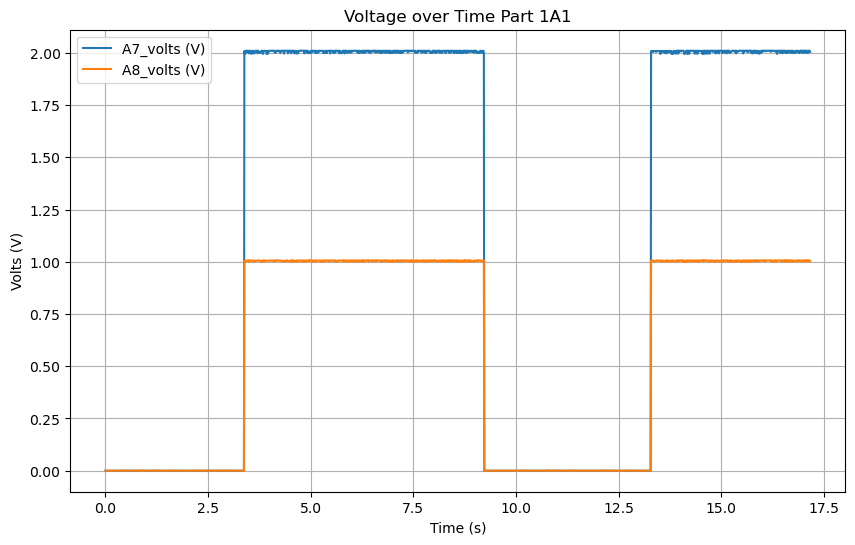

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting A7_volts
plt.plot(data1A1["time"], data1A1["A7_volts"], label="A7_volts (V)")

# Plotting A8_volts
plt.plot(data1A1["time"], data1A1["A8_volts"], label="A8_volts (V)")

# Adding labels and title
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
plt.title("Voltage over Time Part 1A1")
plt.legend()  # Show legend

# Display the plot
plt.grid(True)  # Add grid
plt.show()

In [9]:
# Assuming you already have loaded your data into data1A1 dictionary

# Find the indices corresponding to time 4 and 8
index_time_4 = np.where(data1A1["time"] == 4)[0][0]
index_time_8 = np.where(data1A1["time"] == 8)[0][0]

# Extract A7_volts and A8_volts data from time 4 to 8
A7_subset = data1A1["A7_volts"][index_time_4:index_time_8+1]
A8_subset = data1A1["A8_volts"][index_time_4:index_time_8+1]

# Calculate the ratio A8/A7 for the subset
ratio_subset = A8_subset / A7_subset

# Calculate the average of the ratio
transfer_ratio_exp = np.mean(ratio_subset)

# Calculate the standard error of the mean
transfer_ratio_exp_error = np.std(ratio_subset) / np.sqrt(len(ratio_subset))

print("Transfer Ratio (H):", transfer_ratio_exp, "+-", transfer_ratio_exp_error)

Transfer Ratio (H): 0.5005873835730561 +- 7.217615229480523e-05


In [23]:
transfer_ratio_theory = 0.5
# we can do comparison test, but they clearly are very similar values
# "Use 1% as the uncertainty in the nominal value for resistors of 1"
# our resistor has a resistance of 10,000 - 1% is 100
# error for transfer ratio is error for V, which is 0.01 (1% of 1)

transfer_ratio_diff = transfer_ratio_exp - transfer_ratio_theory
transfer_ratio_error = 2*np.sqrt(transfer_ratio_exp_error**2 + 0.01**2)

print(transfer_ratio_diff, "<", transfer_ratio_error)

0.0005873835730560995 < 0.02000052093291173


In [ ]:
### Part 1A2

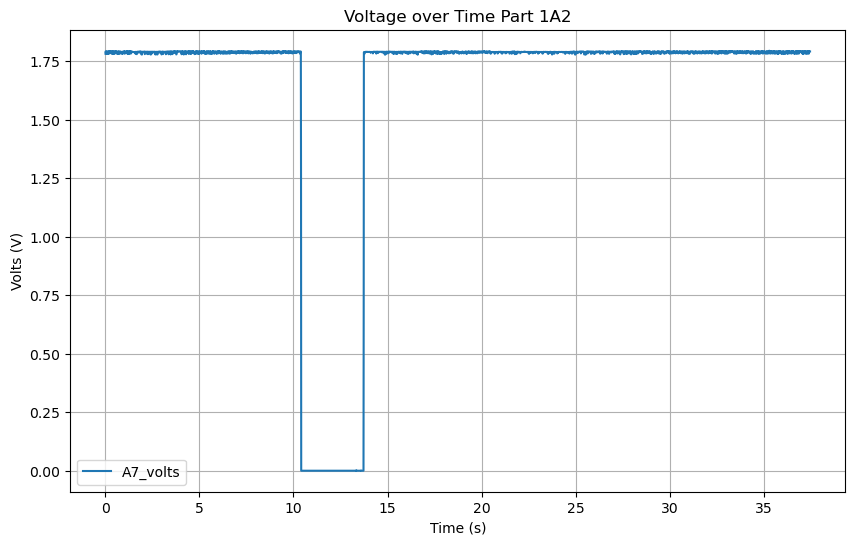

In [30]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting A7_volts
plt.plot(data1A2["time"], data1A2["A7_volts"], label="A7_volts")

# Adding labels and title
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
plt.title("Voltage over Time Part 1A2")
plt.legend()  # Show legend

# Display the plot
plt.grid(True)  # Add grid
plt.show()

In [26]:
# we got the error here where 2.0 DAC outputs 1.8
dmm_measurement_1a2 = 1.8

index_time_10 = np.where(data1A2["time"] == 10)[0][0]

# Extract A7_volts data from time 0 to 10
A7_subset = data1A2["A7_volts"][:index_time_10+1]

# Calculate the average value
volts_1a2_exp = np.mean(A7_subset)

error_1a2_exp = np.std(A7_subset) / np.sqrt(len(A7_subset))

print("Average value from 0 to 10 seconds:", volts_1a2_exp, "+-", error_1a2_exp)

Average value from 0 to 10 seconds: 1.7882833487987517 +- 0.00010408577259940286


In [25]:
# we can do comparison test
# "Use 1% as the uncertainty in the nominal value for resistors of 1"
# our resistor has a resistance of 10,000 - 1% is 100
# error for transfer ratio is error for V, which is 0.01 (1% of 1)

volts_diff_1a2 = np.abs(volts_1a2_exp - dmm_measurement_1a2)
volts_error_1a2 = 2*np.sqrt(error_1a2_exp**2 + 0.01**2)

print(volts_diff_1a2, "<", volts_error_1a2)

0.011716651201248318 < 0.020001083355464286


In [27]:
### Part 1B1

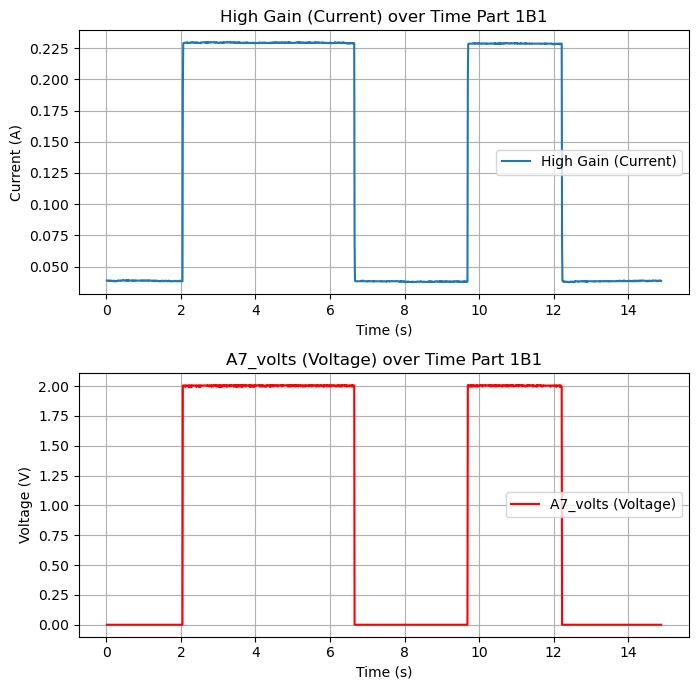

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

# Plotting high_gain (current)
ax1.plot(data1B1["time"], data1B1["high_gain"], label="High Gain (Current)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Current (A)")
ax1.set_title("High Gain (Current) over Time Part 1B1")
ax1.legend()
ax1.grid(True)

# Plotting A7_volts (voltage)
ax2.plot(data1B1["time"], data1B1["A7_volts"], label="A7_volts (Voltage)", color="red")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Voltage (V)")
ax2.set_title("A7_volts (Voltage) over Time Part 1B1")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [42]:
predicted_current = 0.2
# Find the indices corresponding to time 2.5 and 6
index_time_2_5 = np.where(data1B1["time"] == 2.5)[0][0]
index_time_6 = np.where(data1B1["time"] == 6)[0][0]

# Extract high_gain data from time 2.5 to 6
high_gain_subset = data1B1["high_gain"][index_time_2_5:index_time_6+1]

# Calculate the average value
average_current_1B1 = np.mean(high_gain_subset)
error_current_1B1 = np.std(high_gain_subset) / np.sqrt(len(high_gain_subset))

print("Average current from 2.5 to 6 seconds:", average_current_1B1, "+-", error_current_1B1)


Average current from 2.5 to 6 seconds: 0.22942821490458953 +- 1.189168230836675e-05


In [44]:
# we can do comparison test
# "Use 1% as the uncertainty in the nominal value for resistors of 1"
# our resistor has a resistance of 10,000 - 1% is 100
# error for transfer ratio is error for V, which is 0.01 (1% of 1)

current_diff_1B1 = np.abs(average_current_1B1 - predicted_current)
current_error_1B1 = 2*np.sqrt(error_current_1B1**2 + 0.01**2)

print(current_diff_1B1, ">", current_error_1B1)

0.029428214904589522 > 0.020000014141205814


In [ ]:
# our current is slighly larger than the accepted value and does not fit in the range

In [45]:
### Part 1B2

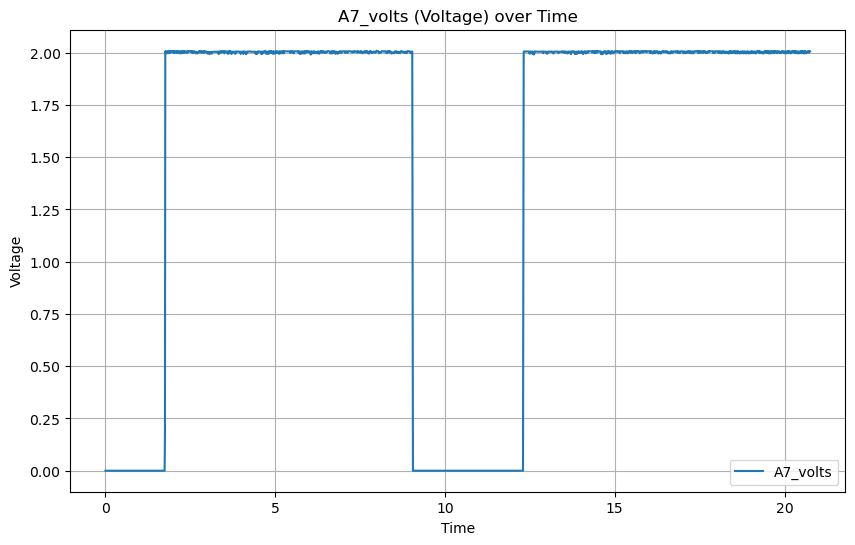

In [47]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting A7_volts
plt.plot(data1B2["time"], data1B2["A7_volts"], label="A7_volts")

# Adding labels and title
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("A7_volts (Voltage) over Time")
plt.legend()  # Show legend

# Display the plot
plt.grid(True)
plt.show()

In [56]:
current_1B2 = 0.2

# current statements
print("The current measured from the DMM (1B2) is:", current_1B2)
print("The average current measured from the iolab (1B1) is:", average_current_1B1)
print("The iolab measurement (1B1) has a higher sensitivity due to its higher precision.")

The current measured from the DMM (1B2) is: 0.2
The average current measured from the iolab (1B1) is: 0.22942821490458953
The iolab measurement (1B1) has a higher sensitivity due to its higher precision.


## Part 2

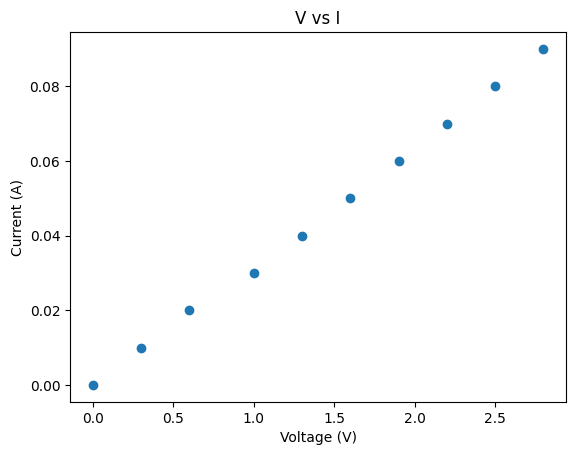

In [10]:
def part2():
    data = get_data_slice(data2AC)
    plt.plot(data["volts"], data["amps"], 'o')
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")
    plt.title("V vs I")
    plt.show()
part2()

## Part 3

In [11]:
def part3():
    v1 = 3.3
    v2 = 4.5
    r1 = 4_700
    r2 = 10_000
    r3 = 4_700
    
    a = np.array(
        [[r1, 0, r3],  # r1x + 0y + r3z = v1
         [0, r2, r3],  # 0x + r2y + r3z = v2
         [1, 1, -1]])  # x + y - z = 0
    b = np.array([v1, v2, 0])
    currents = np.linalg.solve(a, b)
    print(["I%s: %.3f mA" %(i+1,a) for i, a in enumerate(currents * 1000)])
    
part3()

['I1: 0.236 mA', 'I2: 0.231 mA', 'I3: 0.466 mA']
